c:\Users\Karan Vikyath V R\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


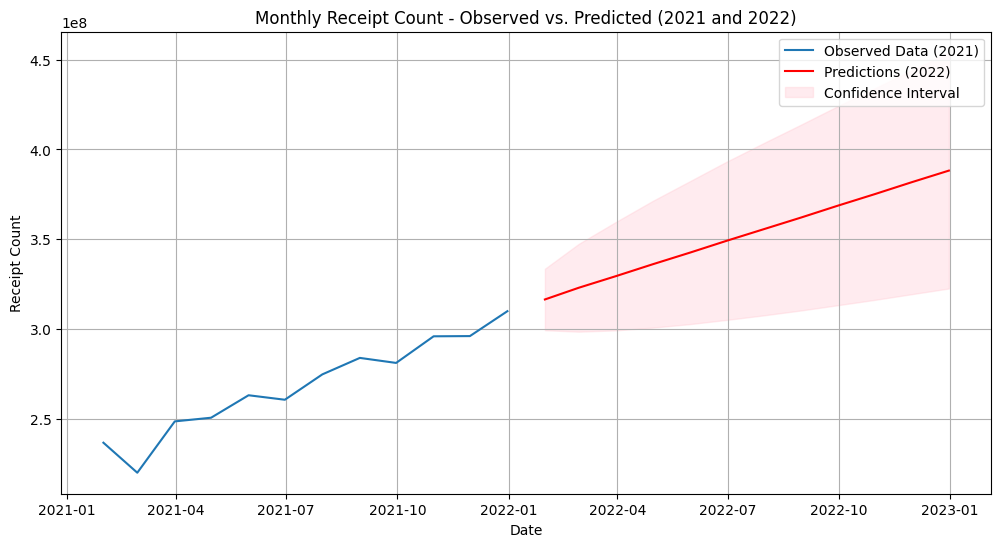

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('data_daily.csv')

# Convert the 'Date' column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['# Date'])
df.set_index('Date', inplace=True)

# Resample the daily data to monthly data
monthly_data = df['Receipt_Count'].resample('M').sum()

# Define the ARIMA model (you can adjust the order)
order = (1, 1, 1)  # ARIMA(p, d, q)
model = ARIMA(monthly_data, order=order)

# Fit the ARIMA model to the data
model_fit = model.fit()

# Create a date range for 2022
start_date = pd.to_datetime('2022-01-01')
date_range_2022 = pd.date_range(start=start_date, periods=12, freq='M')

# Get the forecast for 2022
forecast = model_fit.get_forecast(steps=12)

# Extract the predicted values and confidence intervals
predictions = forecast.predicted_mean
ci_lower = forecast.conf_int()['lower Receipt_Count']
ci_upper = forecast.conf_int()['upper Receipt_Count']

# Plot both the observed data (2021) and the predictions (2022)
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data.values, label='Observed Data (2021)')
plt.plot(date_range_2022, predictions, label='Predictions (2022)', linestyle='-', color='red')
plt.fill_between(date_range_2022, ci_lower, ci_upper, color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.title('Monthly Receipt Count - Observed vs. Predicted (2021 and 2022)')
plt.legend()
plt.grid(True)

plt.savefig('static/comparison_plot.png')
plt.close()

